In [294]:
import datetime as dt
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [295]:
#import CSV from project github
covid19Dataframe = pd.read_csv("https://raw.githubusercontent.com/WhipSnake23/Python-Class-Project/main/Data/owid-covid-data.csv")

#scrub data from rolled up rows for each region globally. NOTE: ~=="not"
covid19Dataframe = covid19Dataframe[~covid19Dataframe.iso_code.str.contains("OWID")]

#Get some date fields created
covid19Dataframe.insert(59,'Day',pd.to_datetime(covid19Dataframe['date']),True)
covid19Dataframe.insert(60,'Month',pd.to_datetime(covid19Dataframe['date']),True)
covid19Dataframe.insert(61,'Year',pd.to_datetime(covid19Dataframe['date']),True)
covid19Dataframe.insert(62,'Year_Month',pd.to_datetime(covid19Dataframe['date']),True)
covid19Dataframe['Day'] = covid19Dataframe['Day'].dt.day
covid19Dataframe['Month'] = covid19Dataframe['Month'].dt.month
covid19Dataframe['Year'] = covid19Dataframe['Year'].dt.year
covid19Dataframe['Year_Month'] = covid19Dataframe['Year'].astype(str) + '-' + covid19Dataframe['Month'].astype(str)
#Convert Date Column to Date and Time
covid19Dataframe['date'] = pd.to_datetime(covid19Dataframe['date'])


covid19DataframeMexico = covid19Dataframe[covid19Dataframe["iso_code"]=="MEX"]
covid19DataframeMexicoGrouped = covid19DataframeMexico.groupby(['Year_Month'])['total_deaths'].sum()
covid19DataframeMexicoDates = covid19DataframeMexico["Year_Month"]


In [296]:
covid19DataframeMexicoTotalDeaths = covid19DataframeMexico["total_deaths"]

<BarContainer object of 418 artists>

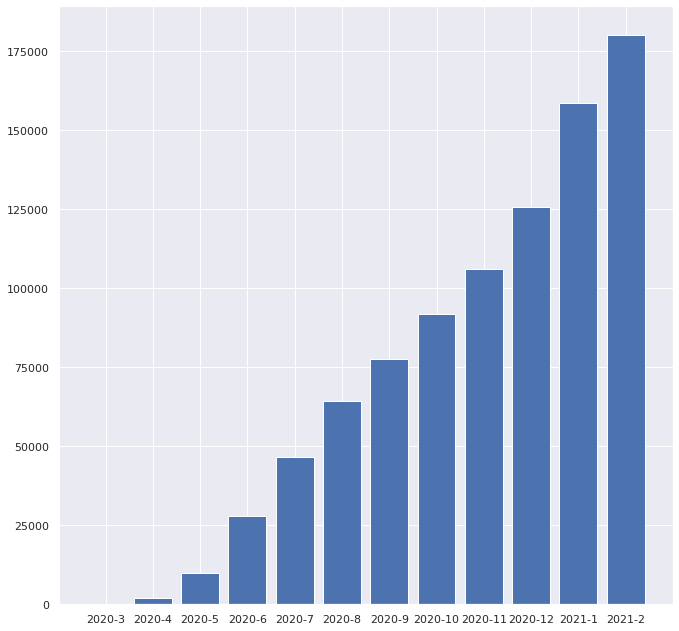

In [297]:
fig = plt.figure(figsize=(11,11))
plt.bar(covid19DataframeMexicoDates, covid19DataframeMexicoTotalDeaths)

In [298]:
countries = covid19Dataframe[['iso_code','median_age']]
countries = countries.drop_duplicates()
top20Countries_MedianAge = countries.nlargest(20,'median_age')
top20Countries_list = top20Countries_MedianAge['iso_code'].values.tolist()
booleanSeries = covid19Dataframe.iso_code.isin(top20Countries_list)
top20Countries_MedianAge = covid19Dataframe[booleanSeries]
top20Countries_MedianAge = top20Countries_MedianAge[['location','date','total_deaths','median_age']]
top20Countries_MedianAge = top20Countries_MedianAge[top20Countries_MedianAge.groupby('location').date.transform('max') == top20Countries_MedianAge['date']]
top20Countries_MedianAge

,location,date,total_deaths,median_age
4446,Austria,2021-02-21,8386.0,44.4
10116,Bulgaria,2021-02-21,9854.0,44.7
15832,Croatia,2021-02-21,5429.0,44.0
16179,Cuba,2021-02-21,296.0,43.1
16891,Czechia,2021-02-21,19214.0,43.3
24933,Germany,2021-02-21,67946.0,46.6
25686,Greece,2021-02-21,6297.0,45.3
28205,Hong Kong,2021-02-02,NaN,44.8
28560,Hungary,2021-02-21,14299.0,43.4
31929,Italy,2021-02-21,95718.0,47.9


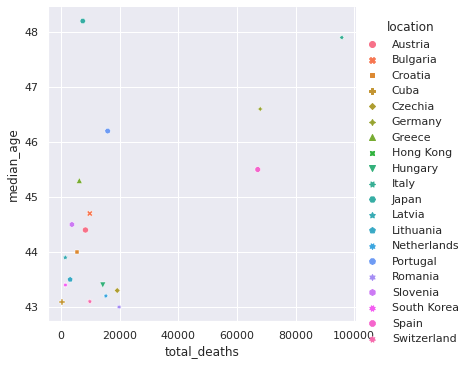

In [299]:
sns.set_theme()

# Create a visualization
sns.relplot(
    data=top20Countries_MedianAge,
    x="total_deaths", y="median_age",
    hue="location", style="location",
)

In [300]:
countries = covid19Dataframe[['iso_code','population_density']]
countries = countries.drop_duplicates()
top20Countries_PopD = countries.nlargest(20,'population_density')
top20Countries_list = top20Countries_PopD['iso_code'].values.tolist()
booleanSeries = covid19Dataframe.iso_code.isin(top20Countries_list)
top20Countries_PopD = covid19Dataframe[booleanSeries]
top20Countries_PopD = top20Countries_PopD[['location','date','total_deaths','population_density']]
top20Countries_PopD = top20Countries_PopD[top20Countries_PopD.groupby('location').date.transform('max') == top20Countries_PopD['date']]
top20Countries_PopD


,location,date,total_deaths,population_density
5511,Bahrain,2021-02-21,423.0,1935.907
5867,Bangladesh,2021-02-21,8349.0,1265.036
6209,Barbados,2021-02-21,31.0,664.463
7669,Bermuda,2021-02-15,NaN,1308.820
14424,Comoros,2021-02-21,143.0,437.352
25320,Gibraltar,2021-02-20,NaN,3457.100
28205,Hong Kong,2021-02-02,NaN,7039.714
29311,India,2021-02-21,156385.0,450.419
35866,Lebanon,2021-02-21,4340.0,594.561
37939,Macao,2021-02-18,NaN,20546.766


In [301]:
fig = px.scatter(top20Countries_PopD, x="total_deaths", y="population_density", color="location",
                 title="Total Deaths by Population Density",
                 labels={"Total Death"} # customize axis label
                )

fig.show()


In [302]:
covid19DataframeGermany = covid19Dataframe[covid19Dataframe["iso_code"]=="ITA"]
covid19DataframeGermany['positive_rate'] = covid19DataframeGermany['positive_rate'] * 100
covid19DataframeGermanyGrouped = covid19DataframeGermany.groupby(['Year_Month'])['positive_rate'].mean()
fig = px.line(covid19DataframeGermany, x="Year_Month", y="positive_rate", title='Italy Positivty Rate')
fig.show()


<ipython-input-302-392f47094a5a>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

